In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
layoffs_df = pd.read_csv('layoffs.csv')

In [3]:
layoffs_df.tail()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
2540,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,Seed,United States,1.0
2541,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,Series C,United States,90.0
2542,EasyPost,Salt Lake City,Logistics,75.0,NaN,2020-03-11,Series A,United States,12.0
2543,Blackbaud,Charleston,Other,500.0,0.14,NaN,Post-IPO,United States,NaN
2544,Open,Bengaluru,Finance,47.0,NaN,NaN,Series D,India,190.0


In [4]:
type(layoffs_df['date'][0])

str

In [5]:
layoffs_df['date'] = pd.to_datetime(layoffs_df['date'],format='%Y-%m-%d')

In [6]:
layoffs_df['date']

0      2023-04-28
1      2023-04-28
2      2023-04-27
3      2023-04-27
4      2023-04-27
          ...    
2540   2020-03-13
2541   2020-03-12
2542   2020-03-11
2543          NaT
2544          NaT
Name: date, Length: 2545, dtype: datetime64[ns]

In [7]:
linechartdat = layoffs_df.groupby([layoffs_df['date'].dt.year.rename('year'),
                    layoffs_df['date'].dt.month_name().rename('month')])['total_laid_off', 'funds_raised'].sum().reset_index()

<ipython-input-7-888b9e58f989>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  linechartdat = layoffs_df.groupby([layoffs_df['date'].dt.year.rename('year'),


In [8]:
linechartdat.head()

,year,month,total_laid_off,funds_raised
0,2020.0,April,26710.0,57516.2000
1,2020.0,August,1969.0,1648.8755
2,2020.0,December,852.0,3683.0000
3,2020.0,July,7112.0,7190.6800
4,2020.0,June,7627.0,76482.9000


In [9]:
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
linechartdat['month'] = pd.Categorical(linechartdat['month'], categories=months, ordered=True)
linechartdat = linechartdat.sort_values(['year', 'month'])

In [10]:
linechartdat['year'] = linechartdat['year'].astype(int)
linechartdat['year'] = linechartdat['year'].astype(str)
linechartdat['year'][0]

'2020'

In [11]:
linechartdat['month-year'] = linechartdat['month'].str.cat(linechartdat['year'], sep=':')
linechartdat = linechartdat.drop(['year', 'month'], axis=1)

In [12]:
linechartdat.to_csv('linechartdat.csv')

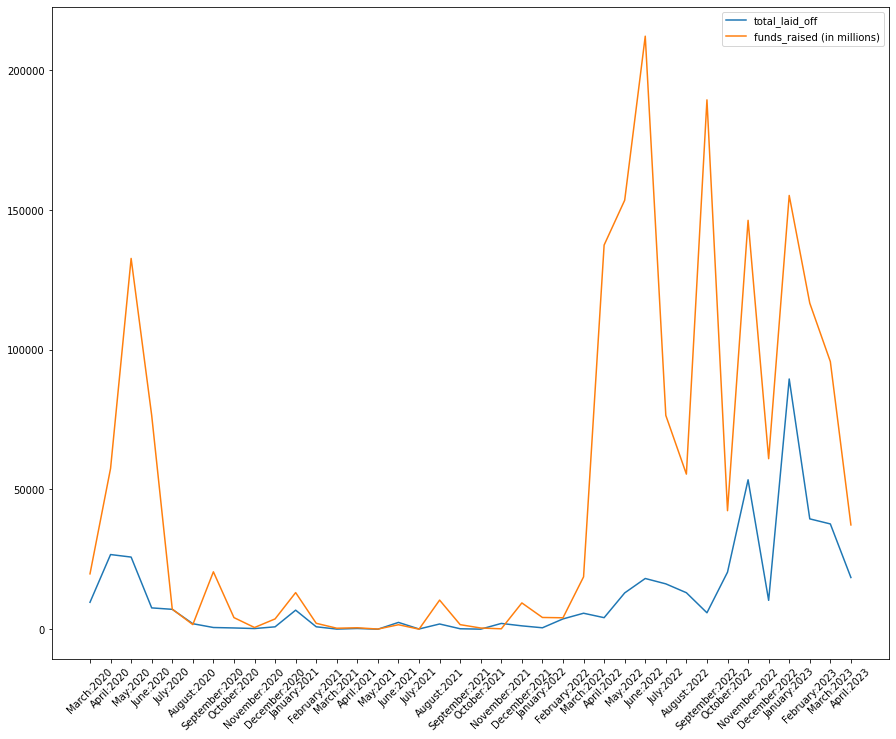

In [13]:
plt.figure(figsize=(15,12))
plt.xticks(rotation = 45)
plt.plot(linechartdat['month-year'], linechartdat['total_laid_off'])
plt.plot(linechartdat['month-year'], linechartdat['funds_raised'])
plt.legend(['total_laid_off', 'funds_raised (in millions)'])
plt.show()

In [14]:
industrylaidoffdat = layoffs_df.groupby(['industry'])['total_laid_off'].sum().reset_index()
industrylaidoffdat.to_csv('industrylaidoffdat.csv')

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Total Laid Off vs. Industry')

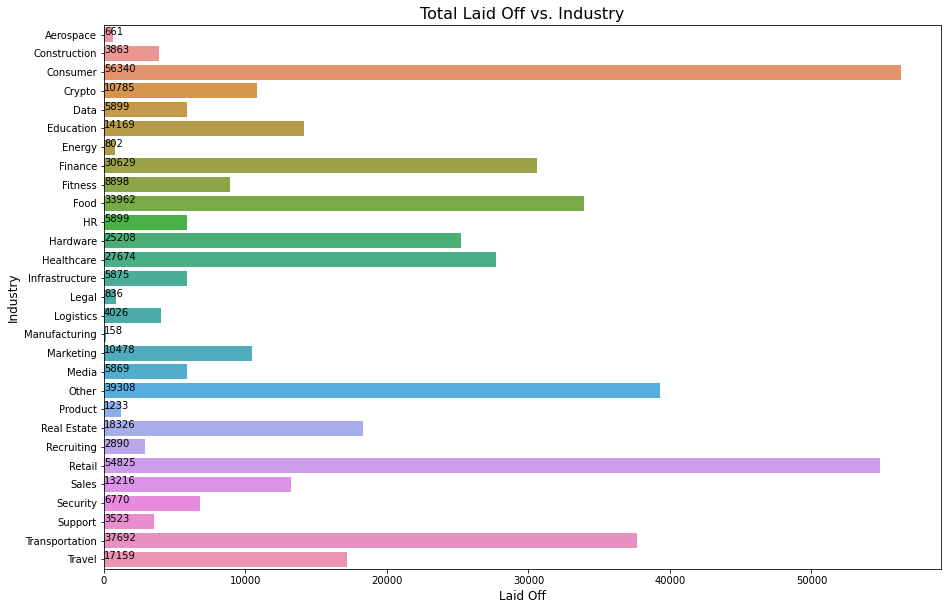

In [15]:
a = plt.cm.cool
plt.figure(figsize=(15,10))
sns.barplot(industrylaidoffdat['total_laid_off'], industrylaidoffdat['industry'], orient='h')

for i, v in enumerate(industrylaidoffdat['total_laid_off']):
    plt.text(0.8,i,int(v),color='k',fontsize=10)

# labels
plt.xlabel('Laid Off', fontsize=12)
plt.ylabel('Industry', fontsize=12)
plt.title('Total Laid Off vs. Industry', fontsize=16)

Here is the total laid off vs industry and as you can see there are many industries where people aren't laid off as much. If you are considering a job during this time, it might be wise to certainly avoid certain industries and try others. Data is one where there aren't as many laid off as opposed to retail and consumer industry jobs. While the tech industry doesn't seem to be very appealing in applying for data science, there are many others readily hiring such as research and other.

In [16]:
companyseriescount = layoffs_df['stage'].value_counts().rename_axis('unique_values').reset_index(name='counts')
companyseriescount.to_csv('companyseriescount.csv')

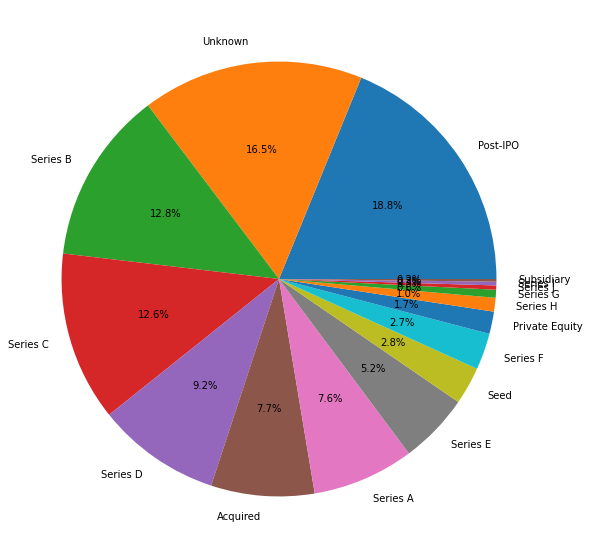

In [17]:
plt.figure(figsize=(15,10));
plt.pie(companyseriescount['counts'], labels = companyseriescount['unique_values'], autopct='%1.1f%%')
plt.show()

I want to have a legend of status and counts.

In [18]:
# boxplots of percentages laid off per year
# extract years
percentlaidoffdat = layoffs_df[['date', 'percentage_laid_off']]
percentlaidoffdat

,date,percentage_laid_off
0,2023-04-28,0.04
1,2023-04-28,1.00
2,2023-04-27,0.16
3,2023-04-27,0.11
4,2023-04-27,0.12
...,...,...
2540,2020-03-13,0.75
2541,2020-03-12,0.40
2542,2020-03-11,NaN
2543,NaT,0.14


In [19]:
years = percentlaidoffdat['date'].dt.year
percentlaidoffdat['year'] = years

<ipython-input-19-b2994616d795>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percentlaidoffdat['year'] = years


In [20]:
percentlaidoffdat = percentlaidoffdat.dropna()
#percentlaidoffdat
percentlaidoffdat['year'] = percentlaidoffdat['year'].astype(int)
percentlaidoffdat['year'] = percentlaidoffdat['year'].astype(str)
percentlaidoffdat

<ipython-input-20-8b87d2ce5352>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percentlaidoffdat['year'] = percentlaidoffdat['year'].astype(int)
<ipython-input-20-8b87d2ce5352>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percentlaidoffdat['year'] = percentlaidoffdat['year'].astype(str)


,date,percentage_laid_off,year
0,2023-04-28,0.04,2023
1,2023-04-28,1.00,2023
2,2023-04-27,0.16,2023
3,2023-04-27,0.11,2023
4,2023-04-27,0.12,2023
...,...,...,...
2537,2020-03-16,1.00,2020
2538,2020-03-16,1.00,2020
2539,2020-03-13,0.10,2020
2540,2020-03-13,0.75,2020


In [21]:
percentlaidoffdat = percentlaidoffdat.drop('date', axis=1)
percentlaidoffdat.to_csv('percentlaidoffdat.csv')

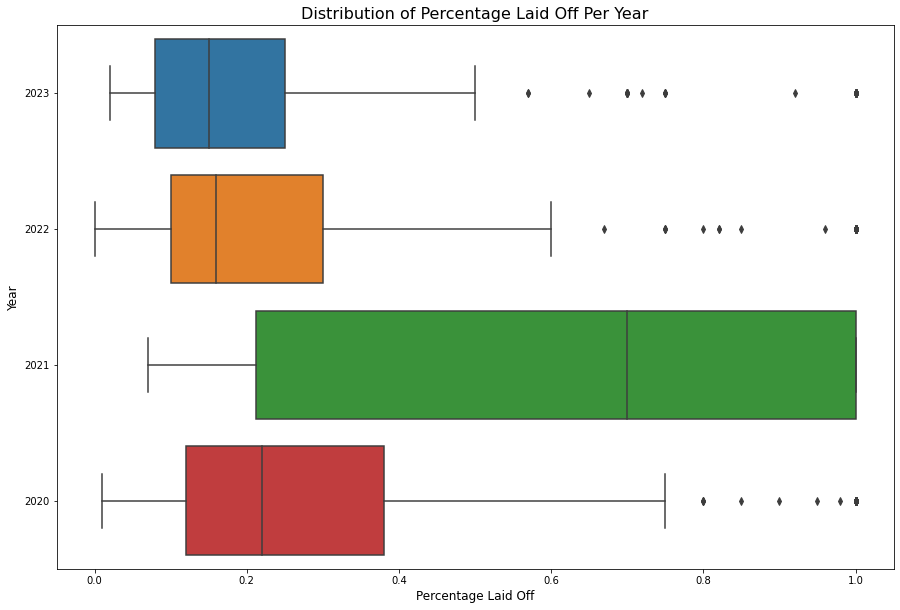

In [22]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='percentage_laid_off', y='year', data=percentlaidoffdat)
plt.xlabel("Percentage Laid Off",fontsize=12)
plt.ylabel("Year",fontsize=12)
plt.title("Distribution of Percentage Laid Off Per Year", fontsize=16)
plt.show()

In [23]:
percentlaidoffdat

,percentage_laid_off,year
0,0.04,2023
1,1.00,2023
2,0.16,2023
3,0.11,2023
4,0.12,2023
...,...,...
2537,1.00,2020
2538,1.00,2020
2539,0.10,2020
2540,0.75,2020


In [24]:
usdollar = pd.read_csv('usdollar.csv')

In [25]:
usdollar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      897 non-null    object 
 1   DTWEXBGS  897 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.1+ KB


In [26]:
#usdollar['DTWEXBGS'] = usdollar['DTWEXBGS'].replace({'None',None})

In [27]:
usdollar['DTWEXBGS'].astype(float)

0      114.98
1      114.99
2      114.96
3      115.15
4      115.14
        ...  
892    120.31
893    120.29
894    120.19
895    119.91
896    119.79
Name: DTWEXBGS, Length: 897, dtype: float64

In [28]:
usdollar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      897 non-null    object 
 1   DTWEXBGS  897 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.1+ KB


In [29]:
usdollar['DTWEXBGS']

0      114.98
1      114.99
2      114.96
3      115.15
4      115.14
        ...  
892    120.31
893    120.29
894    120.19
895    119.91
896    119.79
Name: DTWEXBGS, Length: 897, dtype: float64

### Presentation Visualization Practice

In [30]:
glassdoor_de = pd.read_csv('glassdoor-2023.csv')

In [31]:
# for heatmap convert location into longitude and latitude and use mapbox density heatmap
# https://plotly.com/python/mapbox-density-heatmaps/

In [32]:
layoffs_df['year'] = pd.DatetimeIndex(layoffs_df['date']).year
layoffs_df['month'] = pd.DatetimeIndex(layoffs_df['date']).month

In [33]:
layoffs_df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,year,month
0,N26,Berlin,Finance,71.0,0.04,2023-04-28,Series E,United States,1700.0,2023.0,4.0
1,Providoor,Melbourne,Food,NaN,1.00,2023-04-28,Unknown,Australia,NaN,2023.0,4.0
2,Dropbox,SF Bay Area,Other,500.0,0.16,2023-04-27,Post-IPO,United States,1700.0,2023.0,4.0
3,Vroom,New York City,Transportation,120.0,0.11,2023-04-27,Post-IPO,United States,1300.0,2023.0,4.0
4,Greenhouse,New York City,Recruiting,100.0,0.12,2023-04-27,Private Equity,United States,110.0,2023.0,4.0


### Distribution of Layoff Locations in 2023

In [34]:
layoffs_23 = layoffs_df[layoffs_df['year'] == 2023]
layoffs_23.location.value_counts()

SF Bay Area      157
New York City     57
Bengaluru         34
Boston            31
Seattle           25
                ... 
Sacramento         1
Bogota             1
New Hope           1
Chester            1
Ottawa             1
Name: location, Length: 117, dtype: int64

In [35]:
layoffs_23

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,year,month
0,N26,Berlin,Finance,71.0,0.04,2023-04-28,Series E,United States,1700.0,2023.0,4.0
1,Providoor,Melbourne,Food,NaN,1.00,2023-04-28,Unknown,Australia,NaN,2023.0,4.0
2,Dropbox,SF Bay Area,Other,500.0,0.16,2023-04-27,Post-IPO,United States,1700.0,2023.0,4.0
3,Vroom,New York City,Transportation,120.0,0.11,2023-04-27,Post-IPO,United States,1300.0,2023.0,4.0
4,Greenhouse,New York City,Recruiting,100.0,0.12,2023-04-27,Private Equity,United States,110.0,2023.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
641,Uniphore,SF Bay Area,Support,76.0,0.10,2023-01-03,Series E,United States,620.0,2023.0,1.0
642,Harappa,New Delhi,Education,60.0,0.30,2023-01-03,Acquired,India,NaN,2023.0,1.0
643,ByteDance,Shanghai,Consumer,NaN,0.10,2023-01-03,Unknown,China,9400.0,2023.0,1.0
644,Amdocs,St. Louis,Support,700.0,0.03,2023-01-02,Post-IPO,United States,NaN,2023.0,1.0


In [36]:
horizontal_bar = layoffs_23['location'].value_counts().rename_axis('location').reset_index(name='counts')
horizontal_bar = horizontal_bar.sort_values('counts', ascending=False)[:25]

In [37]:
a = plt.cm.Pastel1
cols = [a(0.5) if (x < 20) else a(0.1) for x in horizontal_bar['counts']]

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


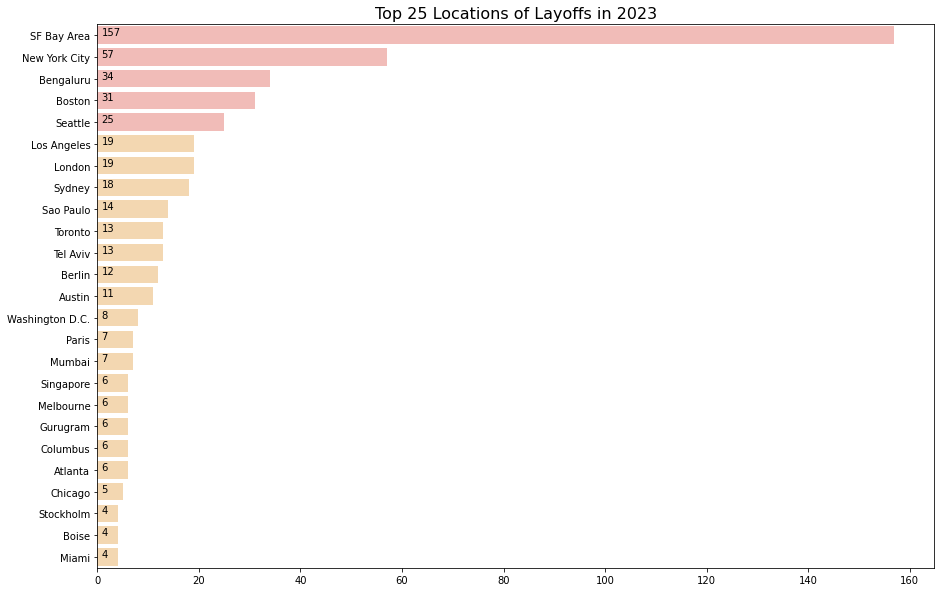

In [38]:
plt.figure(figsize=(15,10))
sns.barplot(horizontal_bar['counts'], horizontal_bar['location'], orient='h',palette=cols)

for i, v in enumerate(horizontal_bar['counts']):
    plt.text(0.8,i,int(v),color='k',fontsize=10)

# labels
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)
plt.title('Top 25 Locations of Layoffs in 2023', fontsize=16)
plt.show()

Since these are the most prominent locations for layoffs, we should be looking into recruitment from areas other than the ones here. For example, just in the united states:

In [39]:
ds_jobs = pd.read_csv('data_science_job.csv', encoding='latin1')
ds_jobs

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48K+ *,"Computer Science,Data quality,Genetics,Mathema...",",,,,"
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48K+ *,"Agile,Data management,Finance,Security,,",",,,,"
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,NaN,90K+ *,"Agile,Architecture,AWS,Computer Science,Comput...","Career development,,,,"
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48K+ *,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108K+,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi..."
...,...,...,...,...,...,...,...,...
3193,Western Digital,Data Scientist - New College Graduate,"Biñan, Philippines",Full Time,Entry-level,39K+ *,"APIs,Clustering,Computer Science,Data visualiz...","Career development,,,,"
3194,Experian,Cloud Data Analyst,"Heredia, Costa Rica",Full Time,Senior-level,92K+ *,"AWS,Big Data,Computer Science,GCP,Snowflake,SQL","Equity,Medical leave,Salary bonus,,"
3195,Locus Robotics,"Robotics Engineer, Sensors","Wilmington, MA, United States",Full Time,Senior-level,62K+ *,"E-commerce,Engineering,Linux,Python,Robotics,S...",",,,,"
3196,ATB Financial,Data Scientist,"Edmonton, Alberta, Canada",Full Time,Entry-level,39K+ *,"Computer Science,Data Analytics,Data Mining,Ec...","Career development,Startup environment,,,"


### Distribution of Locations Hiring in 2023

In [40]:
horizontal_bar2 = ds_jobs['Location'].value_counts().rename_axis('location').reset_index(name='counts')[:25]
horizontal_bar2.shape

(25, 2)

In [41]:
a = plt.cm.Pastel1
cols2 = [a(0.5) if (x < 50) else a(0.1) for x in horizontal_bar2['counts']]

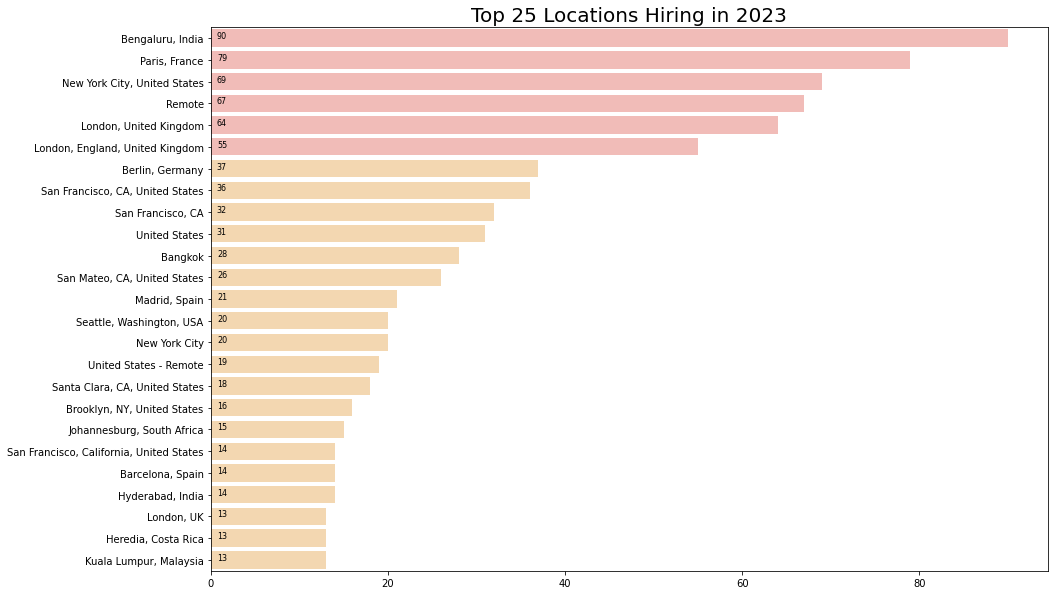

In [42]:
plt.figure(figsize=(15,10))
sns.barplot(x=horizontal_bar2['counts'], y=horizontal_bar2['location'], orient='h', palette=cols2)

for i, v in enumerate(horizontal_bar2['counts'][:50]):
    plt.text(0.7,i,int(v),color='k',fontsize=8)

# labels
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)
plt.title('Top 25 Locations Hiring in 2023', fontsize=20)
plt.show()

In [43]:
ds_jobs.head()

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48K+ *,"Computer Science,Data quality,Genetics,Mathema...",",,,,"
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48K+ *,"Agile,Data management,Finance,Security,,",",,,,"
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,NaN,90K+ *,"Agile,Architecture,AWS,Computer Science,Comput...","Career development,,,,"
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48K+ *,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108K+,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi..."


In [44]:
ds_jobs.columns = ds_jobs.columns.str.replace(' ', '')
ds_jobs.columns

Index(['Company', 'JobTitle', 'Location', 'JobType', 'Experiencelevel',
       'Salary', 'Requirmentofthecompany', 'Facilities'],
      dtype='object')

### Histogram of salaries offered in 2023

In [45]:
# histogram of salaries offered in 2023
ds_jobs_clean = ds_jobs.dropna()
ds_jobs_clean['Salary'] = ds_jobs_clean['Salary'].str.replace(r'[*K+]', '', regex=True)
salary_clean = []
for i, v in enumerate(ds_jobs_clean['Salary']):
    if 'EUR' in str(v):
        v = v[3:]
        v = round(float(v)*1.1, 2)
        salary_clean.append(v)
    elif 'GBP' in v:
        v = v[3:]
        v = round(float(v)*1.27, 2)
        salary_clean.append(v)
    else:
        salary_clean.append(float(v))

salary = pd.DataFrame()
salary['clean'] = salary_clean

<ipython-input-45-82b3c81f0d58>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_jobs_clean['Salary'] = ds_jobs_clean['Salary'].str.replace(r'[*K+]', '', regex=True)


In [46]:
salary

,clean
0,48.0
1,48.0
2,48.0
3,108.0
4,184.0
...,...
2772,39.0
2773,92.0
2774,62.0
2775,39.0


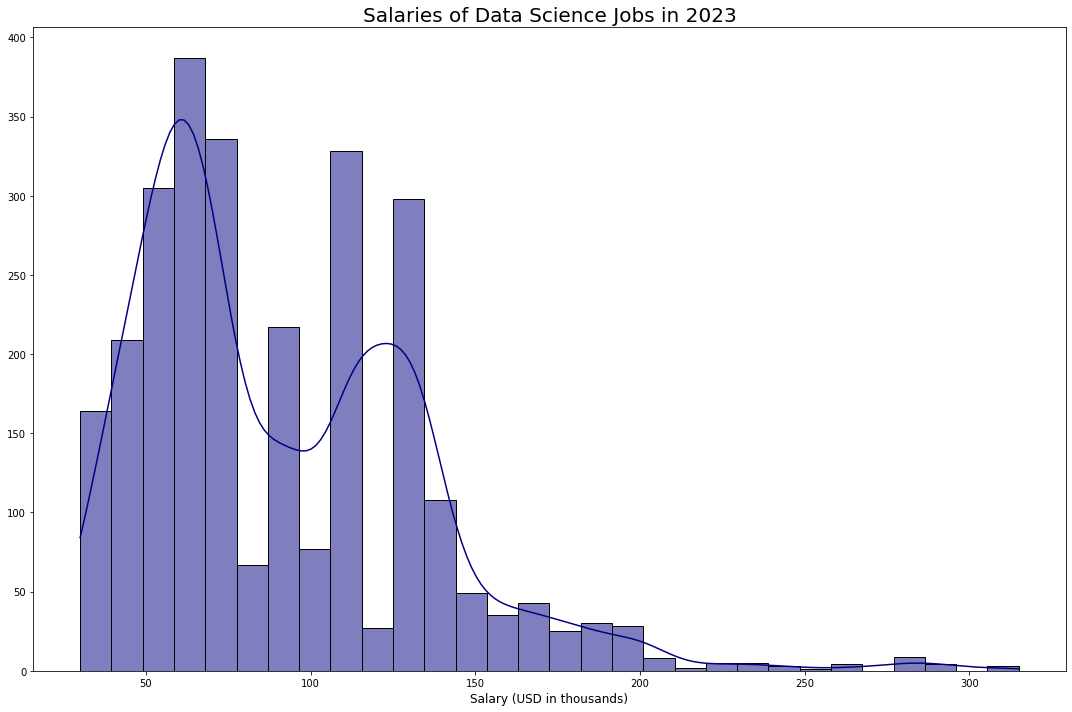

In [47]:
plt.figure(figsize=(15,10))
sns.histplot(data=salary, x='clean', color = 'navy', kde=True, bins=30)
plt.xlabel('Salary (USD in thousands)', fontsize=12)
plt.ylabel('', fontsize=12)
plt.title('Salaries of Data Science Jobs in 2023', fontsize=20)
plt.xticks()
plt.tight_layout()
plt.show()

In [70]:
salary['clean'].describe()

count    2777.000000
mean       91.294937
std        43.550796
min        30.000000
25%        59.000000
50%        77.000000
75%       115.000000
max       315.000000
Name: clean, dtype: float64

### Top 25 Data Science Job Positions in 2023

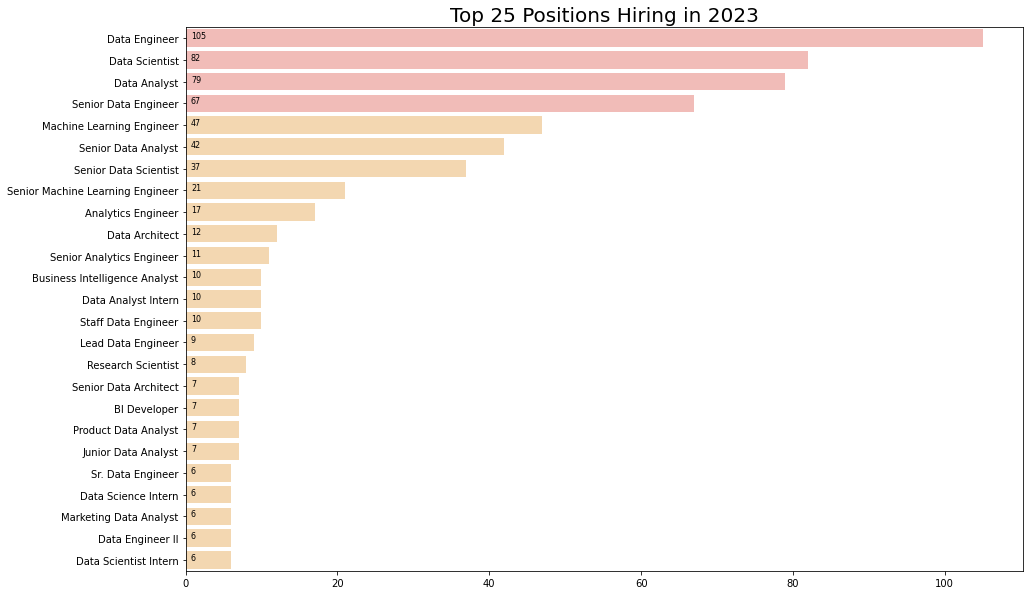

In [49]:
# top 25 position
horizontal_bar3 = ds_jobs['JobTitle'].value_counts().rename_axis('title').reset_index(name='counts')[:25]
cols3 = [a(0.5) if (x < 50) else a(0.1) for x in horizontal_bar3['counts']]
plt.figure(figsize=(15,10))
sns.barplot(x=horizontal_bar3['counts'], y=horizontal_bar3['title'], orient='h', palette = cols3)

for i, v in enumerate(horizontal_bar3['counts']):
    plt.text(0.7,i,int(v),color='k',fontsize=8)

# labels
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)
plt.title('Top 25 Positions Hiring in 2023', fontsize=20)
plt.show()

As mentioned before, data engineering is one of the more influential career paths as companies seek to understand and store more and more complex forms of real-time data. 

### Donut Chart with Job Level to the Position Offered

In [50]:
# donut chart with levels of job_education to job_experience
print(ds_jobs['Experiencelevel'].value_counts())
print(ds_jobs['JobType'].value_counts())

Senior-level       1876
Entry-level         506
Mid-level           452
Executive-level     128
Name: Experiencelevel, dtype: int64
Full Time     3116
Internship      75
Part Time        6
Name: JobType, dtype: int64


In [51]:
# first layer
experience = ds_jobs['Experiencelevel'].value_counts().rename_axis('experience').reset_index(name='counts')

# second layer
subgroups = ['Full Time', 'Internship', 'Part Time']*4
subgroup_values=[]
subgroup_labels=[]

for level in experience['experience'].unique():
    for idx, name in enumerate(ds_jobs[ds_jobs['Experiencelevel'] == level]['JobType'].value_counts().index.tolist()):
        subgroup_values.append(ds_jobs[ds_jobs['Experiencelevel'] == level]['JobType'].value_counts()[idx])
        subgroup_labels.append(name)

print(subgroup_labels, subgroup_values)

['Full Time', 'Full Time', 'Internship', 'Part Time', 'Full Time', 'Part Time', 'Full Time'] [1876, 429, 75, 2, 448, 4, 128]


In [52]:
groupcolors = [a(0.2), a(0.3), a(0.5), a(0.1)]
subgroupcolors = [a(0.4), a(0.4), a(0.7), a(0.8), a(0.4), a(0.7), a(0.4)]

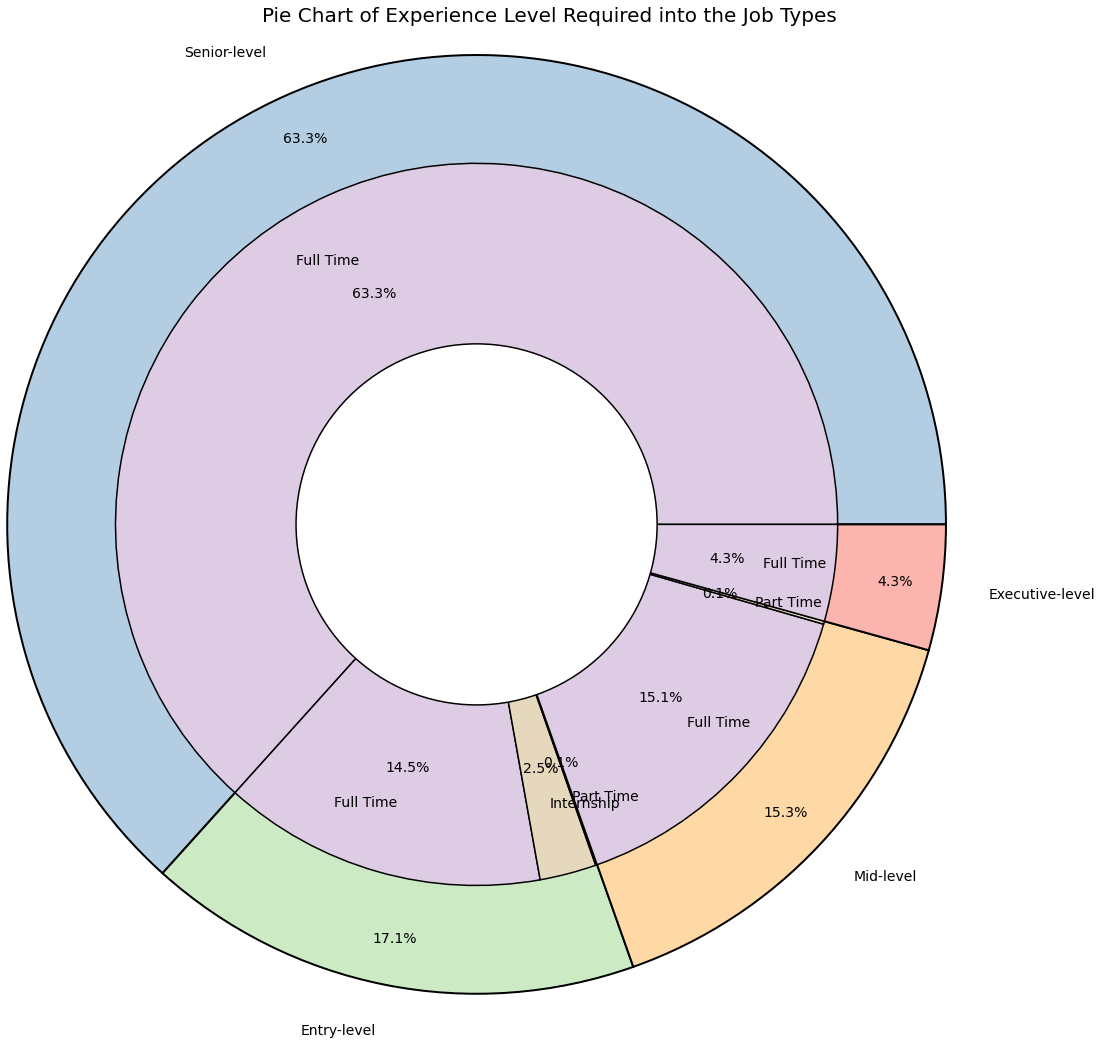

In [53]:
fig = plt.figure(figsize=(15,15))
mypie = plt.pie(experience['counts'], radius=1.3, labels=experience['experience'].unique(), autopct='%1.1f%%', pctdistance=0.9, labeldistance=1.1, 
                   wedgeprops = {"edgecolor" : "black", 'linewidth': 2,'antialiased': True},
                   textprops={'fontsize': 14}, colors = groupcolors)
 
# Second Ring (Inside)
mypie2 = plt.pie(subgroup_values, radius=1.3-0.3, labels=subgroup_labels, autopct='%1.1f%%', pctdistance=0.7, labeldistance=0.8, 
        wedgeprops = {"edgecolor" : "black", 'linewidth': 1.5,'antialiased': True}, textprops={'fontsize': 14}, 
       colors = subgroupcolors)
plt.margins(0,0)
 
centre_circle = plt.Circle((0, 0), 0.5,fc='white', edgecolor='black', linewidth= 1.5)
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

#
plt.suptitle('Pie Chart of Experience Level Required into the Job Types', size=20)
plt.tight_layout()
# show it
plt.show()

In [71]:
experience

,experience,counts
0,Senior-level,1876
1,Entry-level,506
2,Mid-level,452
3,Executive-level,128


In [54]:
# word charts for job_languages, job_cloud, job_viz, job_databases, job_bigdata, job_devops
# for understanding what are the most crucial skills needed for each job, essentially how to market to the general public
ds_jobs

,Company,JobTitle,Location,JobType,Experiencelevel,Salary,Requirmentofthecompany,Facilities
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48K+ *,"Computer Science,Data quality,Genetics,Mathema...",",,,,"
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48K+ *,"Agile,Data management,Finance,Security,,",",,,,"
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,NaN,90K+ *,"Agile,Architecture,AWS,Computer Science,Comput...","Career development,,,,"
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48K+ *,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108K+,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi..."
...,...,...,...,...,...,...,...,...
3193,Western Digital,Data Scientist - New College Graduate,"Biñan, Philippines",Full Time,Entry-level,39K+ *,"APIs,Clustering,Computer Science,Data visualiz...","Career development,,,,"
3194,Experian,Cloud Data Analyst,"Heredia, Costa Rica",Full Time,Senior-level,92K+ *,"AWS,Big Data,Computer Science,GCP,Snowflake,SQL","Equity,Medical leave,Salary bonus,,"
3195,Locus Robotics,"Robotics Engineer, Sensors","Wilmington, MA, United States",Full Time,Senior-level,62K+ *,"E-commerce,Engineering,Linux,Python,Robotics,S...",",,,,"
3196,ATB Financial,Data Scientist,"Edmonton, Alberta, Canada",Full Time,Entry-level,39K+ *,"Computer Science,Data Analytics,Data Mining,Ec...","Career development,Startup environment,,,"


### Word Cloud on PowerBI

In [55]:
from wordcloud import WordCloud, STOPWORDS
words = ' '.join(ds_jobs['Requirmentofthecompany'])

In [56]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in ds_jobs['Requirmentofthecompany']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

In [57]:
import regex as re
ds_jobs['Requirmentofthecompany'] = ds_jobs['Requirmentofthecompany'].apply(lambda x: re.sub(',', ' ', x))
ds_jobs['Requirmentofthecompany'][:5]

0    Computer Science Data quality Genetics Mathema...
1             Agile Data management Finance Security  
2    Agile Architecture AWS Computer Science Comput...
3         Engineering Industrial Oracle Power BI R R&D
4    AWS Azure Computer Science Consulting Dataflow...
Name: Requirmentofthecompany, dtype: object

In [58]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [59]:
count = CountVectorizer()
# calling the fit_transform across every row in the stemmed column
bag_of_words = count.fit_transform(ds_jobs['Requirmentofthecompany'].values)
# displaying matrix with dimensions
bag_of_words

<3198x297 sparse matrix of type '<class 'numpy.int64'>'
	with 23490 stored elements in Compressed Sparse Row format>

In [60]:
counts = list(count.vocabulary_.values())
words = list(count.vocabulary_.keys())

quals = pd.DataFrame(counts, words).reset_index()
quals.columns = ['word', 'counts']

In [61]:
quals.sort_values(by='counts', ascending=False)

,word,counts
234,xsd,296
233,xml,295
80,warehousing,294
55,warehouse,293
264,vue,292
...,...,...
144,ai,4
8,agile,3
235,agi,2
213,3d,1


In [62]:
quals.to_csv('word_diagram.csv')

In [63]:
datasciencejobs = pd.read_csv('companiesdata.csv', encoding = 'utf-16')
datasciencejobs

,Company,Sector,Sector_Group,Revenue,Employee,Company_Score,Reviews,Director,Director_Score,URL
0,BOK Financial,Finance,Finance,XXXL,XL,3.6,469.0,Stacy Kymes,0.80,https://www.bokfinancial.com/
1,Live Nation,Audiovisual and Media Communications,Media Communications,XXL,XXXL,4.1,1174.0,Michael Rapino,0.89,http://www.livenationentertainment.com/careers
2,Amex,Finance,Finance,XXXL,XXXL,4.1,8879.0,Stephen J Squeri,0.85,https://www.americanexpress.com/
3,Staples,Wholesale and Retail Sales,Sales,XXXL,XXXL,3.4,13161.0,Michael Motz,0.61,https://www.staples.com/
4,M&T Bank,Finance,Finance,XXL,XXXL,3.5,2474.0,René Jones,0.78,https://www.mtb.com/
...,...,...,...,...,...,...,...,...,...,...
13066,Ply Gem Windows & Doors,Manufacturing,Product Manufacturing,XXL,XXXL,3.0,1782.0,Rose Lee,0.59,https://www.cornerstonebuildingbrands.com/
13067,Goulding's Lodge,Hotels and Resorts,Tourism and Accommodation,NaN,M,3.1,8.0,NaN,NaN,http://www.gouldings.com/
13068,HF Foods Group,Restaurants and Food Services,Restaurants and Food Services,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13069,Blue Mountain Hospital District,Healthcare,Health,XS,S,3.7,20.0,NaN,NaN,NaN


In [64]:
barsectors = datasciencejobs['Sector_Group'].value_counts().rename_axis('Sector').reset_index(name='counts')
barsectors

,Sector,counts
0,Information Technology,1360
1,Health,1098
2,Government,960
3,Product Manufacturing,938
4,Finance,740
5,Education,623
6,Sales,453
7,Construction,302
8,Consulting,302
9,Insurance,265


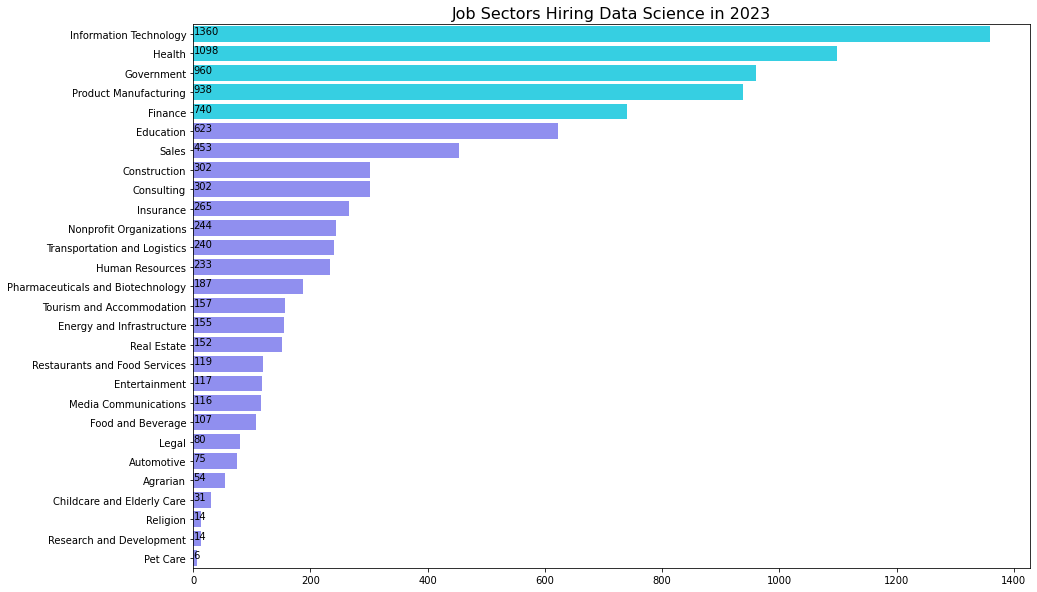

In [65]:
plt.figure(figsize=(15,10))
a = plt.cm.cool
cols = [a(0.5) if (x < 700) else a(0.1) for x in barsectors['counts']]
sns.barplot(x=barsectors['counts'], y=barsectors['Sector'], orient='h',palette=cols, )

for i, v in enumerate(barsectors['counts']):
    plt.text(0.8,i,int(v),color='k',fontsize=10)

# labels
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)
plt.title('Job Sectors Hiring Data Science in 2023', fontsize=16)
plt.show()

In [76]:
data_engineer = pd.read_csv('data_engineer.csv')

In [77]:
data_engineer.columns = data_engineer.iloc[0]
data_engineer = data_engineer[1:]

In [79]:
data_engineer['Country'].value_counts()

Israel            246
United States     241
France            227
Portugal          182
Germany           155
Sweden            143
Singapore         134
Austria           128
Spain             126
United Kingdom    118
Romania           111
Poland            108
Hong Kong          96
Denmark            85
Hungary            83
Italy              73
Czech Republic     68
Australia          66
Ireland            61
Belgium            61
Finland            57
Switzerland        55
Greece             53
New Zealand        49
Luxembourg         39
Japan              38
Taiwan             37
Netherlands        37
South Korea        32
Norway             30
Turkey             20
Canada              4
Name: Country, dtype: int64